# Revenue Analysis and Data pre-processing

In this lesson, we will be focusing on analyzing the revenue information from the cleaned and optimized GStore dataset. We will also pre-process the data to make it ready for data modeling.

The goal of this lesson is to understand how the target column correlates with the feature columns and what kind of pre-processing steps are generally required before modeling the data using Machine Learning.

Let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

Next, importing the CSV file called `cleaned_gstore_data.csv` which contains the cleaned information about each user's website visit along with the revenue they generated for Google. 

In [2]:
# Reading in the CSV file as a DataFrame
store_df = pd.read_csv('data/cleaned_gstore_data.csv', low_memory=False)

In [3]:
# Looking at the first five rows
store_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,...,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Organic Search,2016-09-02,1131660440785968503,1472830385,1,1472830385,Chrome,Windows,False,desktop,...,0.0,(not set),google,organic,(not provided),False,0,NoAds,NoAds,NoAds
1,Organic Search,2016-09-02,377306020877927890,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,...,0.0,(not set),google,organic,(not provided),False,0,NoAds,NoAds,NoAds
2,Organic Search,2016-09-02,3895546263509774583,1472865386,1,1472865386,Chrome,Windows,False,desktop,...,0.0,(not set),google,organic,(not provided),False,0,NoAds,NoAds,NoAds
3,Organic Search,2016-09-02,4763447161404445595,1472881213,1,1472881213,UC Browser,Linux,False,desktop,...,0.0,(not set),google,organic,google + online,False,0,NoAds,NoAds,NoAds
4,Organic Search,2016-09-02,27294437909732085,1472822600,2,1472822600,Chrome,Android,True,mobile,...,0.0,(not set),google,organic,(not provided),True,0,NoAds,NoAds,NoAds


In [4]:
# Printing the shape
store_df.shape

(903653, 31)

Let us start the analysis by looking at how much percentage of the customers are actually generating revenue for the GStore.

Since a single customer can have multiple rows of revenue information in the dataset tied up with their session history, let us group our data based on the `fullVisitorId` and then, sum the revenue. 

In [5]:
# Grouping up the data based on the visitor ID and summing the total revenue for each user
rev_df = store_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

In [6]:
# Printing the DataFrame
rev_df

,fullVisitorId,totals.transactionRevenue
0,0000010278554503158,0.0
1,0000020424342248747,0.0
2,0000027376579751715,0.0
3,0000039460501403861,0.0
4,0000040862739425590,0.0
...,...,...
714162,9999963186378918199,0.0
714163,999997225970956660,0.0
714164,999997550040396460,0.0
714165,9999978264901065827,0.0


Then, we can select the customers who are generating positive revenue, that is, greater than 0.

In [7]:
# Selecting the customers who are generating revenue
positive_rev_df = rev_df[rev_df['totals.transactionRevenue'] > 0.0].reset_index(drop=True)

# Printing the first five rows
positive_rev_df.head()

,fullVisitorId,totals.transactionRevenue
0,0000213131142648941,33590000.0
1,0002871498069867123,96350000.0
2,0003450834640354121,57950000.0
3,0003961110741104601,4980000.0
4,000435324061339869,44790000.0


In [8]:
# Printing the shape
positive_rev_df.shape

(9996, 2)

Finding out what percentage of the customers are generating revenue,

In [9]:
# (Number of positive revenue rows / Number of all rows) * 100
(9996/714167) * 100 

1.399672625590373

Only 1.39% of the users are actually generating revenue for the store. 

This means that the revenue data is highly imbalanced and there are way more non-revenue generating users in the dataset than revenue-generating customers.

Next, let us look at the distribution of the revenue information in the dataset using statistical and graphical methods.

In [10]:
# Printing some statistics of our data
print("Transaction Revenue Min Value:", positive_rev_df["totals.transactionRevenue"].min())
print("Transaction Revenue Mean Value:", positive_rev_df["totals.transactionRevenue"].mean())
print("Transaction Revenue Median Value:", positive_rev_df["totals.transactionRevenue"].median()) 
print("Transaction Revenue Max Value:", positive_rev_df["totals.transactionRevenue"].max())

Transaction Revenue Min Value: 10000.0
Transaction Revenue Mean Value: 154068751.50060025
Transaction Revenue Median Value: 48845000.0
Transaction Revenue Max Value: 77113430000.0


x_axis_val: range(0, 9996)
y_axis_val: [1.000000e+04 4.000000e+04 9.000000e+04 ... 1.517012e+10 1.602375e+10
 7.711343e+10]


Text(0.5, 1.0, 'Transaction Revenue Distribution')

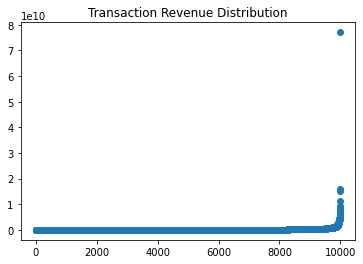

In [11]:
# Setting the x-axis and y-axis values
x_axis_val = range(positive_rev_df.shape[0])
print("x_axis_val:", x_axis_val)

y_axis_val = np.sort(positive_rev_df['totals.transactionRevenue'].values)
print("y_axis_val:", y_axis_val)

# Plotting a scatter plot
plt.scatter(x_axis_val, y_axis_val)
plt.title('Transaction Revenue Distribution')

We can also plot a Kernel Density Estimation plot which will give us a proper idea about the skewness of the data. Skewness refers to the fact that there are cases where one or a few points are much larger than the bulk of the data. 

Text(0.5, 1.0, 'Transaction Revenue Distribution')

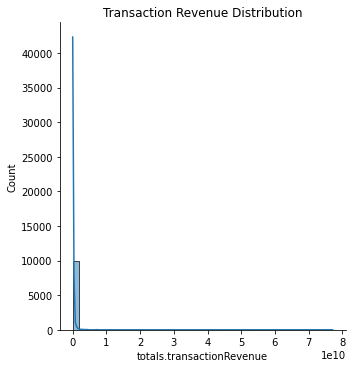

In [12]:
# Plotting a KDE plot
sns.displot(positive_rev_df["totals.transactionRevenue"], bins=40, kde=True)
plt.title('Transaction Revenue Distribution')

A common step to fix such skewness is to find the logarithmic value of the data. We will be using the `log1p()` method for this.

We can later convert the logarithmic value to the original value using the `expm1()` method from Numpy.

In [13]:
print("Logarithmic value of 20 + 1:", np.log1p(20))
print("Original value:", np.expm1(np.log1p(20)))

Logarithmic value of 20 + 1: 3.044522437723423
Original value: 20.0


In [14]:
# Return the natural logarithm of one plus the input array, element-wise.
positive_rev_df['totals.transactionRevenue'] = np.log1p(positive_rev_df['totals.transactionRevenue'].values)

Text(0.5, 1.0, 'Logarithmic Transaction Revenue Distribution')

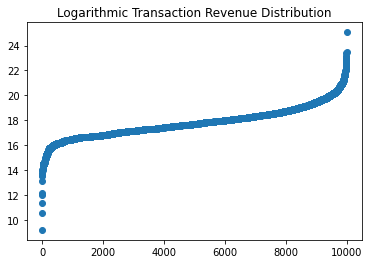

In [15]:
# Setting the x-axis and y-axis values
x_axis_val = range(positive_rev_df.shape[0])
y_axis_val = np.sort(positive_rev_df['totals.transactionRevenue'].values)

# Plotting a scatter plot
plt.scatter(x_axis_val, y_axis_val)
plt.title('Logarithmic Transaction Revenue Distribution')

Text(0.5, 1.0, 'Logarithmic Transaction Revenue Distribution')

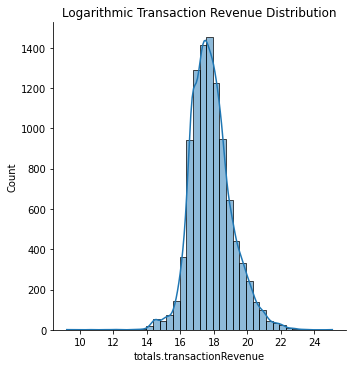

In [16]:
# Plotting a KDE plot
sns.displot(positive_rev_df["totals.transactionRevenue"], bins=40, kde=True)
plt.title('Logarithmic Transaction Revenue Distribution')

The data now looks like it follows a normal distribution (mean = median) and there is no large skewness in the data. 

Let us also change the value of the transaction revenue in the original dataset to a logarithmic range to remove data skewness.

In [17]:
# Return the natural logarithm of one plus the input array, element-wise.
store_df['totals.transactionRevenue'] = np.log1p(store_df['totals.transactionRevenue'].values)

Now, let us check the correlation of all numeric columns with the revenue.

In [18]:
# Checking the correlation of all numeric columns with the revenue
store_df.corr()['totals.transactionRevenue']

visitId                                0.010491
visitNumber                            0.023666
visitStartTime                         0.010491
device.isMobile                       -0.046071
totals.hits                            0.378804
totals.pageviews                       0.400734
totals.bounces                        -0.113049
totals.newVisits                      -0.108003
totals.transactionRevenue              1.000000
trafficSource.isTrueDirect             0.076432
trafficSource.adwordsClickInfo.page    0.010931
Name: totals.transactionRevenue, dtype: float64

None of the columns are highly correlated with the revenue information. However, `totals.pageviews` and `totals.hits` do have some visible correlation. 

So, we have to make sure that we take the combination of multiple features in order to predict the revenue. For this we can convert the categorical columns to numeric columns by label encoding them.

Label encoding converts the values in the columns containing non-numeric values to values between 0 and n_classes-1.

In [19]:
# Printing a concise summary of the DataFrame
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   channelGrouping                               903653 non-null  object 
 1   date                                          903653 non-null  object 
 2   fullVisitorId                                 903653 non-null  object 
 3   visitId                                       903653 non-null  int64  
 4   visitNumber                                   903653 non-null  int64  
 5   visitStartTime                                903653 non-null  int64  
 6   device.browser                                903653 non-null  object 
 7   device.operatingSystem                        903653 non-null  object 
 8   device.isMobile                               903653 non-null  bool   
 9   device.deviceCategory                         90

In [20]:
# All categorical columns
cat_cols = ["channelGrouping", "device.browser",
            "device.isMobile",
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']

In [21]:
# Running a for loop
for col in cat_cols:
    
    # Initializing the Label Encoder
    lbl = preprocessing.LabelEncoder()
    
    # Label encoding caterogical column 
    store_df[col] = lbl.fit_transform(store_df[col].astype('str').values)

In [22]:
# looking at the first five rows
store_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,...,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,4,2016-09-02,1131660440785968503,1472830385,1,1472830385,11,16,0,0,...,0.0,0,149,5,11,0,0,0,1,1
1,4,2016-09-02,377306020877927890,1472880147,1,1472880147,16,7,0,0,...,0.0,0,149,5,11,0,0,0,1,1
2,4,2016-09-02,3895546263509774583,1472865386,1,1472865386,11,16,0,0,...,0.0,0,149,5,11,0,0,0,1,1
3,4,2016-09-02,4763447161404445595,1472881213,1,1472881213,46,6,0,0,...,0.0,0,149,5,1098,0,0,0,1,1
4,4,2016-09-02,27294437909732085,1472822600,2,1472822600,11,1,1,1,...,0.0,0,149,5,11,1,0,0,1,1


In [23]:
# Checking the correlation of all numeric columns with the revenue
store_df.corr()['totals.transactionRevenue']

channelGrouping                                -0.000807
visitId                                         0.010491
visitNumber                                     0.023666
visitStartTime                                  0.010491
device.browser                                 -0.045807
device.operatingSystem                         -0.040621
device.isMobile                                -0.046071
device.deviceCategory                          -0.042843
geoNetwork.continent                           -0.088376
geoNetwork.subContinent                        -0.031715
geoNetwork.country                              0.080101
geoNetwork.region                              -0.032398
geoNetwork.metro                                0.017485
geoNetwork.city                                -0.014020
geoNetwork.networkDomain                       -0.065589
totals.hits                                     0.378804
totals.pageviews                                0.400734
totals.bounces                 

Now, we have a lot of columns that are somewhat correlated with the revenue information. The data is now ready for applying Machine Learning on it.

By the way, we haven't performed **feature scaling** in this dataset to convert all numeric values within a certain range (0 to 1 / -1 to 1 / etc.). This is because we will be using a tree-based algorithm for data modeling and in such algorithms, feature scaling is not required since the result will not be affected.

Finally, let us save this DataFrame in a CSV file to use in the next lesson of this course. 

In [24]:
# Exporting as a CSV file
store_df.to_csv('data/preprocessed_gstore_data.csv', header=True, index=False)

That is it for this lesson!

As an exercise, I would encourage you to pre-process the data even further by removing columns that have almost 0 correlation with the revenue information. Doing so may help you get more accurate predictions when applying Machine Learning to predict the revenue.